In [55]:
import cv2
import matplotlib.pyplot as plt
import imutils
import numpy as np
from glob import glob

In [46]:
def croup_countor_lung_image(image , plot=False):
    
    #GRAY IMAGE
    gray_scale = cv2.cvtColor(example_image,cv2.COLOR_BGR2GRAY) 
                 
    gray_scale = cv2.GaussianBlur(gray_scale, (5,5),0)
    threshold_image = cv2.threshold(gray_scale, 45, 255, cv2.THRESH_BINARY)[1]
    
    #REMOVING NOISE
    threshold_image = cv2.erode(threshold_image, None, iterations=2)
    threshold_image = cv2.dilate(threshold_image, None, iterations=2)
    
    countor = cv2.findContours(threshold_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    countor = imutils.grab_contours(countor)
    c = max(countor, key=cv2.contourArea)
    
    extreme_pents_left = tuple(c[c[:,:,0].argmin()][0])
    extreme_pents_right = tuple(c[c[:,:,0].argmax()][0])
    extreme_pents_top = tuple(c[c[:,:,1].argmin()][0])
    extreme_pents_bot = tuple(c[c[:,:,1].argmax()][0])
    
    new_image = image[extreme_pents_top[1] : extreme_pents_bot[1] ,extreme_pents_left[0] : extreme_pents_right[0]  ]

    if plot:
        plt.figure()
        plt.subplot(1,2,1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False, labelbottom=False, 
                       labeltop=False, labelleft=False, labelright=False)
        plt.title('original Image')
        
        plt.subplot(1,2,2)
        plt.imshow(new_image)
        plt.title('cropped Image')
        plt.show()
        
        return new_image
    

In [ ]:
def apply_Croupping(image_paths):
    cropped = []
    for path in image_paths:
        image = cv2.imread(path)
        r_image = croup_countor_lung_image(image, True)
        cropped.append(r_image)
    return cropped
        

(512, 512, 3)


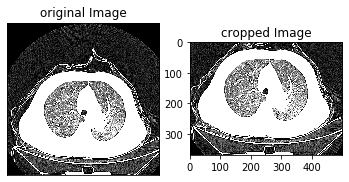

In [47]:
example_image  = cv2.imread("IMAGE PATH TO TEST")
print(example_image.shape)
retur = croup_countor_lung_image(example_image, True)
#gray_scale = cv2.cvtColor(example_image,cv2.COLOR_BGR2GRAY) 
#plt.imshow(gray_scale, cmap="gray")

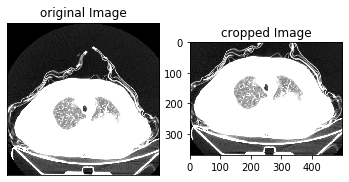

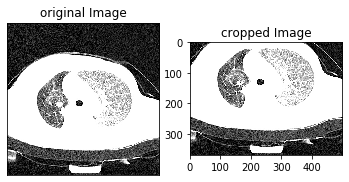

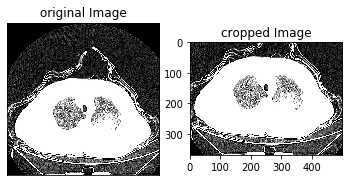

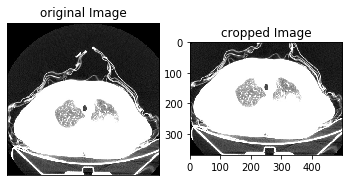

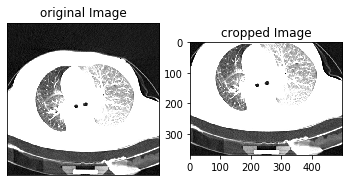

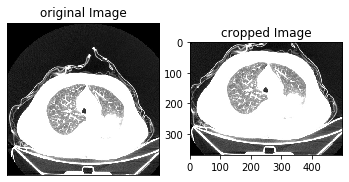

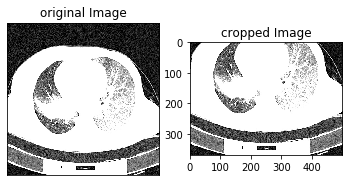

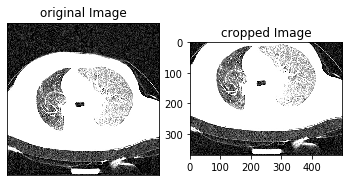

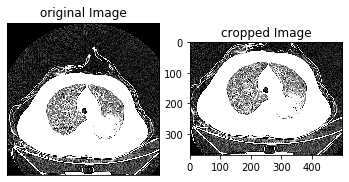

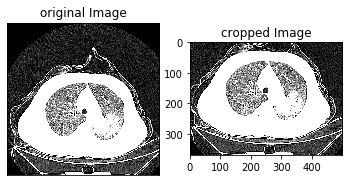

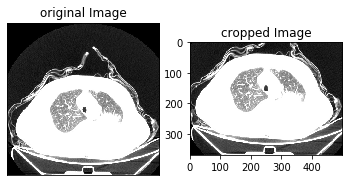

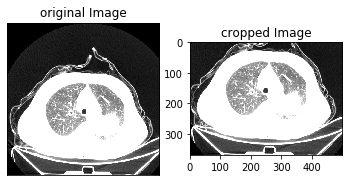

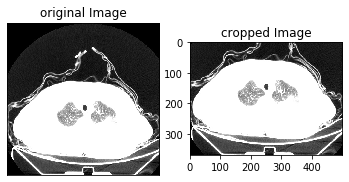

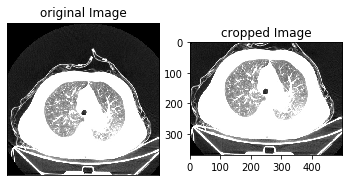

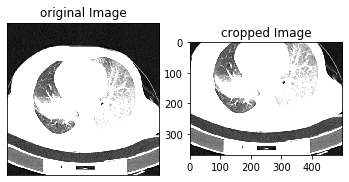

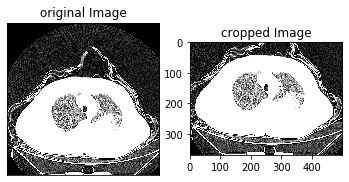

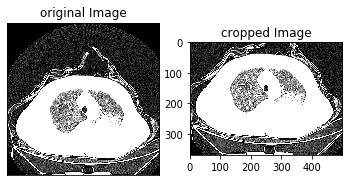

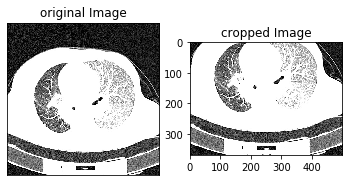

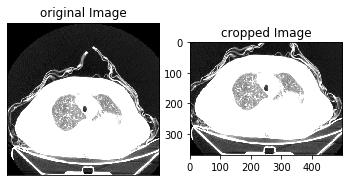

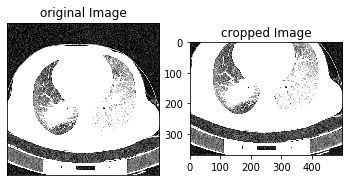

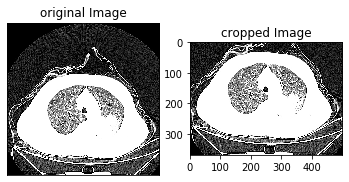

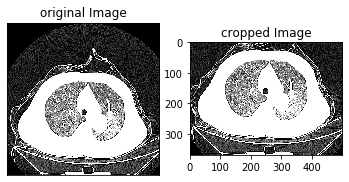

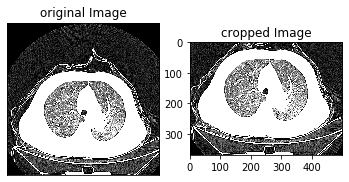

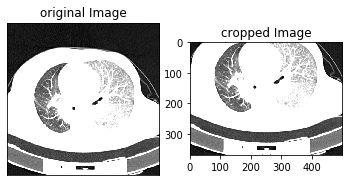

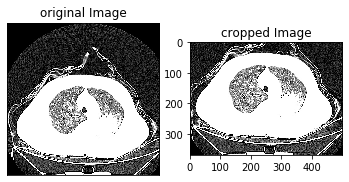

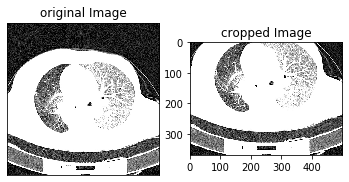

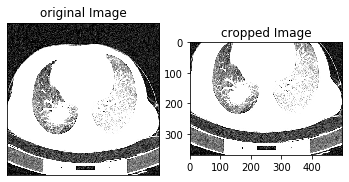

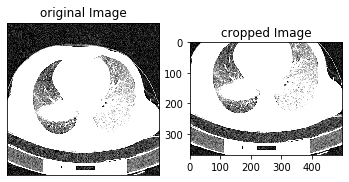

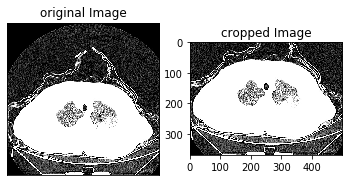

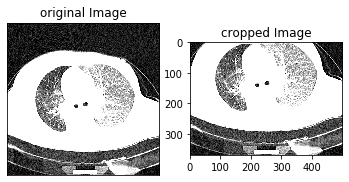

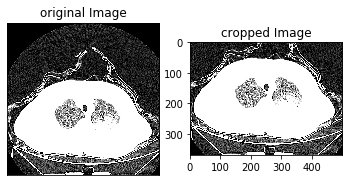

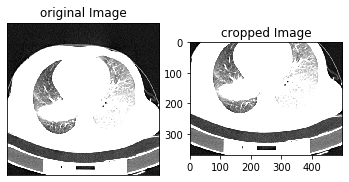

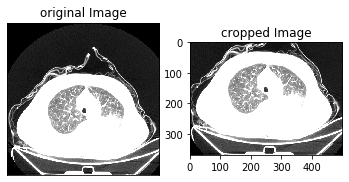

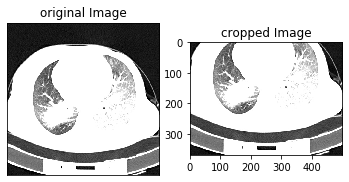

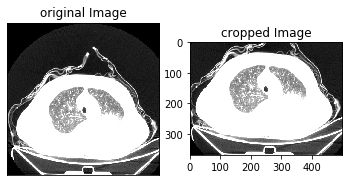

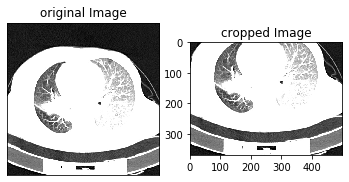

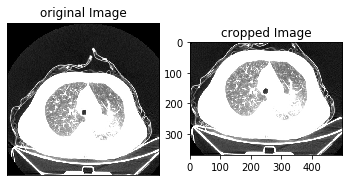

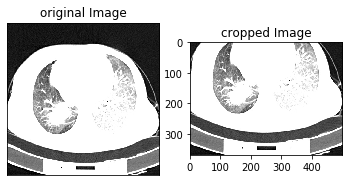

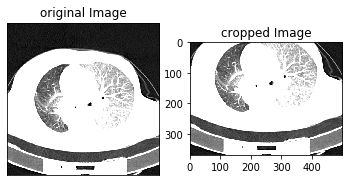

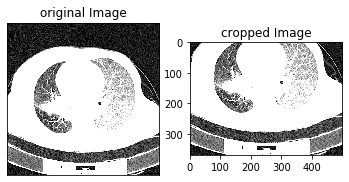

In [53]:
path_a = glob("FOLDER PATH OF IMAGES DATA")
res = apply_Croupping(path_a)

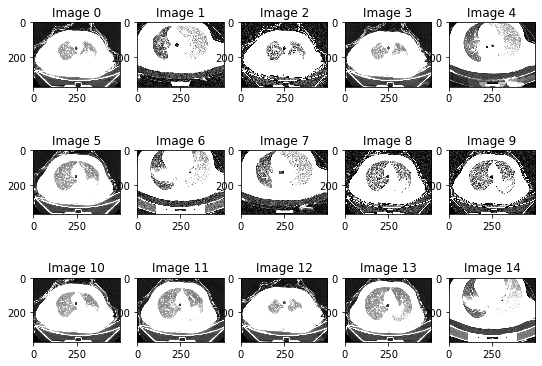

In [63]:
plt.figure(figsize = (9,9))
number = 0
for counter in range(15):
    number += 1
    r = np.random.randint(0 , 30 , 1)
    plt.subplot(4 , 5 ,number)
    plt.imshow(res[counter])
    plt.title("Image {}".format(counter))